<a href="https://colab.research.google.com/github/fakhar-nadeem/Data-Science/blob/main/Assessment_DAS7005%20v1.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Importing libraries and mounting drive:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Mounting the google drive to the colab environment:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Assessment Data-20250304/'

/content/drive/MyDrive/Assessment Data-20250304


In [4]:
%ls

Assessment_combined.csv
combined_output.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


### **Loading the Pandas dataframe:**

In [5]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
urban_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
suburban_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
rural_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
industrial_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")


# **Data Cleaning**

## Cleaning Urban Dataset:



### **1 - Checking Null Values:**

In [6]:
urban_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [7]:
#Filling rows with missing values
# urban_df['PM2.5'].fillna(urban_df['PM2.5'].mean(), inplace=True)
# urban_df['PM10'].fillna(urban_df['PM10'].mean(), inplace=True)
# urban_df['SO2'].fillna(urban_df['SO2'].mean(), inplace=True)
# urban_df['NO2'].fillna(urban_df['NO2'].mean(), inplace=True)
# urban_df['CO'].fillna(urban_df['CO'].mean(), inplace=True)
# urban_df['O3'].fillna(urban_df['O3'].mean(), inplace=True)
# urban_df['TEMP'].fillna(urban_df['TEMP'].mean(), inplace=True)
# urban_df['PRES'].fillna(urban_df['PRES'].mean(), inplace=True)
# urban_df['DEWP'].fillna(urban_df['DEWP'].mean(), inplace=True)
# urban_df['RAIN'].fillna(urban_df['RAIN'].mean(), inplace=True)
# urban_df['wd'].fillna(urban_df['wd'].mode()[0], inplace=True)
# urban_df['WSPM'].fillna(urban_df['WSPM'].mean(), inplace=True)
urban_df.fillna(method='ffill', inplace=True)
urban_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [8]:
urban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   3.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   300.0  60.0   
4          5  2013      3    1     4    3.0   3.0   7.0  18.0   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[35064 rows x 18 columns]

### **3 - Removing Duplicates:**

In [9]:
urban_df.drop_duplicates(inplace=True)

In [10]:
urban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0   
2          3  2013      3    1     2    7.0   7.0   3.0  17.0   300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0   300.0  60.0   
4          5  2013      3    1     4    3.0   3.0   7.0  18.0   200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0   
35060  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  54.0   
35061  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  28.0   
35062  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  15.0   
35063  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3      -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi  
4      -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[35064 rows x 18 columns]

### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [11]:
print(urban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [12]:
#Creating a datetime column
urban_df['datetime'] = pd.to_datetime(urban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
urban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
urban_df = urban_df[new_order]
urban_df

datetime     No  PM2.5  PM10   SO2   NO2      CO    O3  TEMP  \
0     2013-03-01 00:00:00      1    9.0   9.0   3.0  17.0   300.0  89.0  -0.5   
1     2013-03-01 01:00:00      2    4.0   4.0   3.0  16.0   300.0  88.0  -0.7   
2     2013-03-01 02:00:00      3    7.0   7.0   3.0  17.0   300.0  60.0  -1.2   
3     2013-03-01 03:00:00      4    3.0   3.0   5.0  18.0   300.0  60.0  -1.4   
4     2013-03-01 04:00:00      5    3.0   3.0   7.0  18.0   200.0  84.0  -1.9   
...                   ...    ...    ...   ...   ...   ...     ...   ...   ...   
35059 2017-02-28 19:00:00  35060   16.0  51.0   3.0  29.0   400.0  73.0  12.5   
35060 2017-02-28 20:00:00  35061   18.0  45.0   3.0  43.0   500.0  54.0  11.6   
35061 2017-02-28 21:00:00  35062   23.0  58.0   5.0  61.0   700.0  28.0  10.8   
35062 2017-02-28 22:00:00  35063   23.0  53.0   9.0  75.0   900.0  15.0  10.5   
35063 2017-02-28 23:00:00  35064   30.0  71.0  11.0  87.0  1200.0   4.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM station  
0      1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1      1025.1 -22.1   0.0   NW   3.9  Dongsi  
2      1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3      1026.2 -25.5   0.0    N   4.9  Dongsi  
4      1027.1 -24.5   0.0  NNW   3.2  Dongsi  
...       ...   ...   ...  ...   ...     ...  
35059  1013.5 -16.2   0.0   NW   2.4  Dongsi  
35060  1013.6 -15.1   0.0  WNW   0.9  Dongsi  
35061  1014.2 -13.3   0.0   NW   1.1  Dongsi  
35062  1014.4 -12.9   0.0  NNW   1.2  Dongsi  
35063  1014.1 -15.9   0.0  NNE   1.3  Dongsi  

[35064 rows x 15 columns]

## Cleaning Suburban Dataset:



### **1 - Checking Null Values:**

In [13]:
suburban_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [14]:
suburban_df.fillna(method='ffill', inplace=True)
suburban_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [15]:
suburban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          3  2013      3    1     2   14.0  14.0   3.0   7.0   200.0  22.0   
3          4  2013      3    1     3   12.0  12.0   3.0   5.0   200.0  22.0   
4          5  2013      3    1     4   12.0  12.0   3.0   5.0   200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 18 columns]

### **3 - Removing Duplicates:**

In [16]:
suburban_df.drop_duplicates(inplace=True)

In [17]:
suburban_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  \
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0   
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0   
2          3  2013      3    1     2   14.0  14.0   3.0   7.0   200.0  22.0   
3          4  2013      3    1     3   12.0  12.0   3.0   5.0   200.0  22.0   
4          5  2013      3    1     4   12.0  12.0   3.0   5.0   200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0   
35060  35061  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   
35061  35062  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   
35062  35063  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   
35063  35064  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi  
...     ...     ...   ...   ...  ...   ...     ...  
35059  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060   9.8  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061   9.1  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062   7.1  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063   7.4  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 18 columns]

### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [18]:
print(suburban_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [19]:
#Creating a datetime column
suburban_df['datetime'] = pd.to_datetime(suburban_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
suburban_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
suburban_df = suburban_df[new_order]
suburban_df

datetime     No  PM2.5  PM10   SO2   NO2      CO    O3  TEMP  \
0     2013-03-01 00:00:00      1    3.0   6.0   3.0   8.0   300.0  44.0  -0.9   
1     2013-03-01 01:00:00      2   12.0  12.0   3.0   7.0   300.0  47.0  -1.1   
2     2013-03-01 02:00:00      3   14.0  14.0   3.0   7.0   200.0  22.0  -1.7   
3     2013-03-01 03:00:00      4   12.0  12.0   3.0   5.0   200.0  22.0  -2.1   
4     2013-03-01 04:00:00      5   12.0  12.0   3.0   5.0   200.0  11.0  -2.4   
...                   ...    ...    ...   ...   ...   ...     ...   ...   ...   
35059 2017-02-28 19:00:00  35060   27.0  72.0   8.0  92.0   800.0  16.0  10.3   
35060 2017-02-28 20:00:00  35061   47.0  55.0  17.0  86.0  1100.0  19.0   9.8   
35061 2017-02-28 21:00:00  35062   18.0  28.0   4.0  30.0   500.0  64.0   9.1   
35062 2017-02-28 22:00:00  35063   18.0  20.0   9.0  33.0   500.0  59.0   7.1   
35063 2017-02-28 23:00:00  35064   15.0  22.0  13.0  34.0   500.0  60.0   7.4   

         PRES  DEWP  RAIN   wd  WSPM station  
0      1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      1027.7 -22.9   0.0   NW   4.5  Shunyi  
...       ...   ...   ...  ...   ...     ...  
35059  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 15 columns]

## Cleaning Rural Dataset:



### **1 - Checking Null Values:**

In [20]:
rural_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [21]:
rural_df.fillna(method='ffill', inplace=True)
rural_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [22]:
rural_df

No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  \
0          1  2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0   
1          2  2013      3    1     1    4.0   4.0  3.0   2.0   100.0  92.0   
2          3  2013      3    1     2    4.0   4.0  3.0   2.0   100.0  91.0   
3          4  2013      3    1     3    3.0   3.0  3.0   2.0   100.0  91.0   
4          5  2013      3    1     4    3.0   3.0  7.0   2.0   300.0  86.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   
35059  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   
35060  35061  2017      2   28    20   21.0  34.0  4.0  24.0   500.0  80.0   
35061  35062  2017      2   28    21   17.0  33.0  2.0  39.0   900.0  60.0   
35062  35063  2017      2   28    22   11.0  29.0  3.0  32.0  1400.0  69.0   
35063  35064  2017      2   28    23   11.0  20.0  2.0  27.0   400.0  77.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
0      -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      -2.7  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2      -3.2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3      -3.3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4      -4.1  1022.1 -22.7   0.0  NNW   2.2  Huairou  
...     ...     ...   ...   ...  ...   ...      ...  
35059   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060   9.5  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061   8.4  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062   8.3  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063   6.7  1009.3 -13.6   0.0   NE   1.9  Huairou  

[35064 rows x 18 columns]

### **3 - Removing Duplicates:**

In [23]:
rural_df.drop_duplicates(inplace=True)

In [24]:
suburban_df

datetime     No  PM2.5  PM10   SO2   NO2      CO    O3  TEMP  \
0     2013-03-01 00:00:00      1    3.0   6.0   3.0   8.0   300.0  44.0  -0.9   
1     2013-03-01 01:00:00      2   12.0  12.0   3.0   7.0   300.0  47.0  -1.1   
2     2013-03-01 02:00:00      3   14.0  14.0   3.0   7.0   200.0  22.0  -1.7   
3     2013-03-01 03:00:00      4   12.0  12.0   3.0   5.0   200.0  22.0  -2.1   
4     2013-03-01 04:00:00      5   12.0  12.0   3.0   5.0   200.0  11.0  -2.4   
...                   ...    ...    ...   ...   ...   ...     ...   ...   ...   
35059 2017-02-28 19:00:00  35060   27.0  72.0   8.0  92.0   800.0  16.0  10.3   
35060 2017-02-28 20:00:00  35061   47.0  55.0  17.0  86.0  1100.0  19.0   9.8   
35061 2017-02-28 21:00:00  35062   18.0  28.0   4.0  30.0   500.0  64.0   9.1   
35062 2017-02-28 22:00:00  35063   18.0  20.0   9.0  33.0   500.0  59.0   7.1   
35063 2017-02-28 23:00:00  35064   15.0  22.0  13.0  34.0   500.0  60.0   7.4   

         PRES  DEWP  RAIN   wd  WSPM station  
0      1025.8 -20.5   0.0   NW   9.3  Shunyi  
1      1026.1 -21.3   0.0   NW   9.4  Shunyi  
2      1026.2 -23.0   0.0   NW   8.6  Shunyi  
3      1027.3 -23.3   0.0   NW   6.6  Shunyi  
4      1027.7 -22.9   0.0   NW   4.5  Shunyi  
...       ...   ...   ...  ...   ...     ...  
35059  1014.2 -12.4   0.0    W   1.8  Shunyi  
35060  1014.5  -9.9   0.0   NW   1.5  Shunyi  
35061  1014.6 -12.7   0.0   NE   1.7  Shunyi  
35062  1015.2 -13.2   0.0  WNW   1.8  Shunyi  
35063  1014.9 -11.9   0.0    N   1.4  Shunyi  

[35064 rows x 15 columns]

### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [25]:
print(rural_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [26]:
#Creating a datetime column
rural_df['datetime'] = pd.to_datetime(rural_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
rural_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
rural_df = rural_df[new_order]
rural_df

datetime     No  PM2.5  PM10  SO2   NO2      CO    O3  TEMP  \
0     2013-03-01 00:00:00      1    7.0   7.0  3.0   2.0   100.0  91.0  -2.3   
1     2013-03-01 01:00:00      2    4.0   4.0  3.0   2.0   100.0  92.0  -2.7   
2     2013-03-01 02:00:00      3    4.0   4.0  3.0   2.0   100.0  91.0  -3.2   
3     2013-03-01 03:00:00      4    3.0   3.0  3.0   2.0   100.0  91.0  -3.3   
4     2013-03-01 04:00:00      5    3.0   3.0  7.0   2.0   300.0  86.0  -4.1   
...                   ...    ...    ...   ...  ...   ...     ...   ...   ...   
35059 2017-02-28 19:00:00  35060   16.0  28.0  2.0  19.0   300.0  95.0   9.9   
35060 2017-02-28 20:00:00  35061   21.0  34.0  4.0  24.0   500.0  80.0   9.5   
35061 2017-02-28 21:00:00  35062   17.0  33.0  2.0  39.0   900.0  60.0   8.4   
35062 2017-02-28 22:00:00  35063   11.0  29.0  3.0  32.0  1400.0  69.0   8.3   
35063 2017-02-28 23:00:00  35064   11.0  20.0  2.0  27.0   400.0  77.0   6.7   

         PRES  DEWP  RAIN   wd  WSPM  station  
0      1020.3 -20.7   0.0  WNW   3.1  Huairou  
1      1020.8 -20.5   0.0  NNW   1.5  Huairou  
2      1020.6 -21.4   0.0   NW   1.8  Huairou  
3      1021.3 -23.7   0.0  NNW   2.4  Huairou  
4      1022.1 -22.7   0.0  NNW   2.2  Huairou  
...       ...   ...   ...  ...   ...      ...  
35059  1008.6 -14.1   0.0  WNW   1.8  Huairou  
35060  1008.9 -14.4   0.0  SSW   1.3  Huairou  
35061  1009.3 -14.6   0.0   SE   1.5  Huairou  
35062  1009.5 -14.7   0.0  ENE   3.2  Huairou  
35063  1009.3 -13.6   0.0   NE   1.9  Huairou  

[35064 rows x 15 columns]

## Cleaning Industrial Dataset:



### **1 - Checking Null Values:**

In [27]:
industrial_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

### **2 - Handling Null values:**

Cannot drop null values as they are equal to more than 5% of rows.

Cannot fill with mean or mode as the dataset is in a time series.

I am using Forward Fill as that is the most suitable in as time series dataset.

In [28]:
industrial_df.fillna(method='ffill', inplace=True)
rural_df.isnull().sum()

datetime    0
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [29]:
industrial_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[35064 rows x 18 columns]

### **3 - Removing Duplicates:**

In [30]:
industrial_df.drop_duplicates(inplace=True)

In [31]:
industrial_df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[35064 rows x 18 columns]

### **4 - Handling Outliers:**

### **5 - Correcting Data Types:**

In [32]:
print(industrial_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [33]:
#Creating a datetime column
industrial_df['datetime'] = pd.to_datetime(industrial_df[['year', 'month', 'day', 'hour']])

#Dropping the individual columns
industrial_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#Rearanging the columns
new_order = ['datetime','No',	'PM2.5',	'PM10', 'SO2',	'NO2'	,'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'wd',	'WSPM',	'station'	]
industrial_df = industrial_df[new_order]
industrial_df

datetime     No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0     2013-03-01 00:00:00      1    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1     2013-03-01 01:00:00      2    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2     2013-03-01 02:00:00      3    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3     2013-03-01 03:00:00      4    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4     2013-03-01 04:00:00      5    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   
...                   ...    ...    ...   ...   ...   ...    ...   ...   ...   
35059 2017-02-28 19:00:00  35060   13.0  37.0   3.0  36.0  400.0  60.0  12.5   
35060 2017-02-28 20:00:00  35061   20.0  43.0   4.0  48.0  500.0  43.0  11.6   
35061 2017-02-28 21:00:00  35062   16.0  33.0   5.0  39.0  500.0  50.0  10.8   
35062 2017-02-28 22:00:00  35063   11.0  24.0   5.0  47.0  500.0  41.0  10.5   
35063 2017-02-28 23:00:00  35064   15.0  27.0   5.0  53.0  600.0  33.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM   station  
0      1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1      1023.2 -18.2   0.0    N   4.7  Guanyuan  
2      1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3      1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4      1025.2 -19.5   0.0    N   2.0  Guanyuan  
...       ...   ...   ...  ...   ...       ...  
35059  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
35060  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
35061  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
35062  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
35063  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[35064 rows x 15 columns]

## Merging all Datasets:

In [34]:
merged_df = pd.concat([urban_df, suburban_df, rural_df, industrial_df], ignore_index=True)
merged_df.to_csv("Assessment_combined.csv", index=False)
merged_df

datetime     No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013-03-01 00:00:00      1    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1      2013-03-01 01:00:00      2    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2      2013-03-01 02:00:00      3    7.0   7.0  3.0  17.0  300.0  60.0  -1.2   
3      2013-03-01 03:00:00      4    3.0   3.0  5.0  18.0  300.0  60.0  -1.4   
4      2013-03-01 04:00:00      5    3.0   3.0  7.0  18.0  200.0  84.0  -1.9   
...                    ...    ...    ...   ...  ...   ...    ...   ...   ...   
140251 2017-02-28 19:00:00  35060   13.0  37.0  3.0  36.0  400.0  60.0  12.5   
140252 2017-02-28 20:00:00  35061   20.0  43.0  4.0  48.0  500.0  43.0  11.6   
140253 2017-02-28 21:00:00  35062   16.0  33.0  5.0  39.0  500.0  50.0  10.8   
140254 2017-02-28 22:00:00  35063   11.0  24.0  5.0  47.0  500.0  41.0  10.5   
140255 2017-02-28 23:00:00  35064   15.0  27.0  5.0  53.0  600.0  33.0   8.6   

          PRES  DEWP  RAIN   wd  WSPM   station  
0       1024.5 -21.4   0.0  NNW   5.7    Dongsi  
1       1025.1 -22.1   0.0   NW   3.9    Dongsi  
2       1025.3 -24.6   0.0  NNW   5.3    Dongsi  
3       1026.2 -25.5   0.0    N   4.9    Dongsi  
4       1027.1 -24.5   0.0  NNW   3.2    Dongsi  
...        ...   ...   ...  ...   ...       ...  
140251  1013.5 -16.2   0.0   NW   2.4  Guanyuan  
140252  1013.6 -15.1   0.0  WNW   0.9  Guanyuan  
140253  1014.2 -13.3   0.0   NW   1.1  Guanyuan  
140254  1014.4 -12.9   0.0  NNW   1.2  Guanyuan  
140255  1014.1 -15.9   0.0  NNE   1.3  Guanyuan  

[140256 rows x 15 columns]

# **Exploratory Data Analysis**

## Shape & Size:

In [35]:
#Find out how big the dataset is.
merged_df.shape

(140256, 15)

In [36]:
#shows columns in list format
merged_df.columns

Index(['datetime', 'No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

## Preview the Data

In [37]:
#First 5 rows
print(merged_df.head())
#Last 5 rows
print(merged_df.tail())

             datetime  No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  \
0 2013-03-01 00:00:00   1    9.0   9.0  3.0  17.0  300.0  89.0  -0.5  1024.5   
1 2013-03-01 01:00:00   2    4.0   4.0  3.0  16.0  300.0  88.0  -0.7  1025.1   
2 2013-03-01 02:00:00   3    7.0   7.0  3.0  17.0  300.0  60.0  -1.2  1025.3   
3 2013-03-01 03:00:00   4    3.0   3.0  5.0  18.0  300.0  60.0  -1.4  1026.2   
4 2013-03-01 04:00:00   5    3.0   3.0  7.0  18.0  200.0  84.0  -1.9  1027.1   

   DEWP  RAIN   wd  WSPM station  
0 -21.4   0.0  NNW   5.7  Dongsi  
1 -22.1   0.0   NW   3.9  Dongsi  
2 -24.6   0.0  NNW   5.3  Dongsi  
3 -25.5   0.0    N   4.9  Dongsi  
4 -24.5   0.0  NNW   3.2  Dongsi  
                  datetime     No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
140251 2017-02-28 19:00:00  35060   13.0  37.0  3.0  36.0  400.0  60.0  12.5   
140252 2017-02-28 20:00:00  35061   20.0  43.0  4.0  48.0  500.0  43.0  11.6   
140253 2017-02-28 21:00:00  35062   16.0  33.0  5.0  39.0  500.0  50.

In [38]:
#Checking the data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  140256 non-null  datetime64[ns]
 1   No        140256 non-null  int64         
 2   PM2.5     140256 non-null  float64       
 3   PM10      140256 non-null  float64       
 4   SO2       140256 non-null  float64       
 5   NO2       140256 non-null  float64       
 6   CO        140256 non-null  float64       
 7   O3        140256 non-null  float64       
 8   TEMP      140256 non-null  float64       
 9   PRES      140256 non-null  float64       
 10  DEWP      140256 non-null  float64       
 11  RAIN      140256 non-null  float64       
 12  wd        140256 non-null  object        
 13  WSPM      140256 non-null  float64       
 14  station   140256 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 16.1+ MB


## Check null values in merged file:

In [39]:
#Checking if there are any null calues in the dataset
merged_df.isnull().sum()

datetime    0
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

## Detecting Duplicates:

In [40]:
# Check for duplicates
print(merged_df.duplicated().sum())

0


## Summary Statistics:

In [41]:
#Basic statistics
print(merged_df.describe())

                            datetime          No          PM2.5  \
count                         140256  140256.000  140256.000000   
mean   2015-03-01 11:29:59.999999744   17532.500      79.831991   
min              2013-03-01 00:00:00       1.000       2.000000   
25%              2014-03-01 05:45:00    8766.750      20.000000   
50%              2015-03-01 11:30:00   17532.500      55.000000   
75%              2016-02-29 17:15:00   26298.250     112.000000   
max              2017-02-28 23:00:00   35064.000     941.000000   
std                              NaN   10122.141      80.658078   

                PM10            SO2            NO2             CO  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean      103.037091      15.462931      46.689204    1209.064411   
min         2.000000       0.285600       1.026500     100.000000   
25%        34.000000       2.000000      21.000000     500.000000   
50%        80.000000       7.000000      39.000000 

## Univariate Analysis:

Univariate analysis focuses on one variable at a time.

### PM2.5 Analysis:

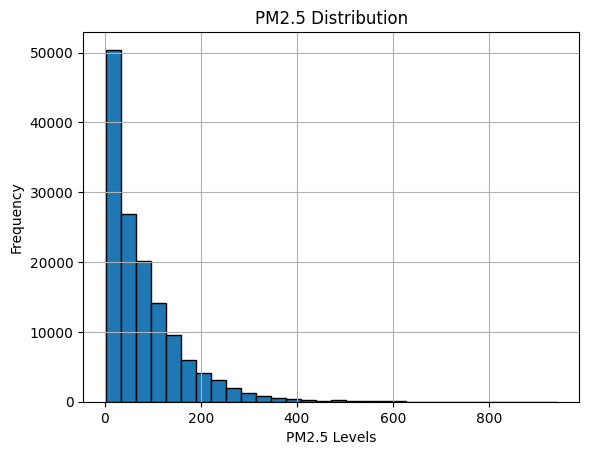

In [42]:
#Histogram shows the distribution of values.
merged_df['PM2.5'].hist(bins=30, edgecolor='black')
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5 Levels")
plt.ylabel("Frequency")
plt.show()

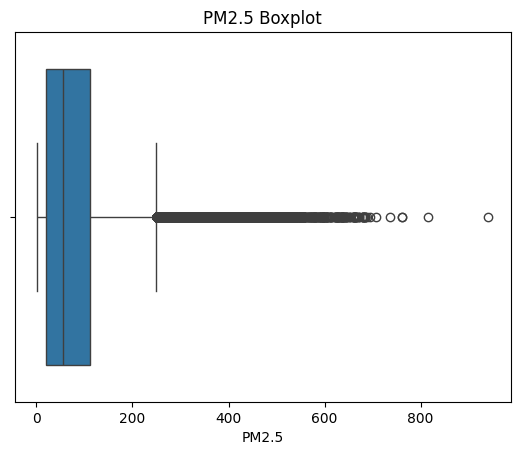

In [43]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM2.5'])
plt.title("PM2.5 Boxplot")
plt.show()

### PM10 Analysis:

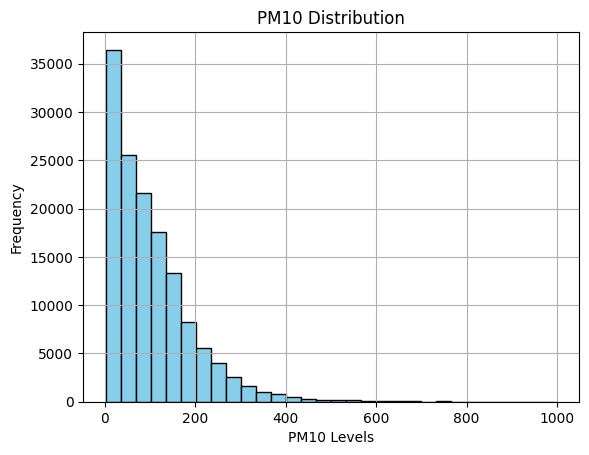

In [44]:
#Histogram shows the distribution of values.
merged_df['PM10'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PM10 Distribution")
plt.xlabel("PM10 Levels")
plt.ylabel("Frequency")
plt.show()

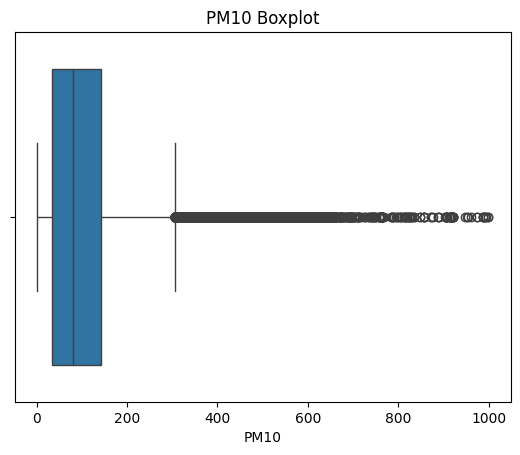

In [45]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PM10'])
plt.title("PM10 Boxplot")
plt.show()

### SO2 Analysis:

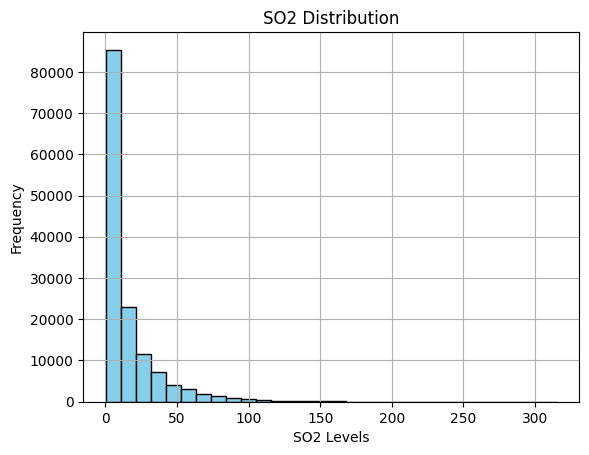

In [46]:
#Histogram shows the distribution of values.
merged_df['SO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("SO2 Distribution")
plt.xlabel("SO2 Levels")
plt.ylabel("Frequency")
plt.show()

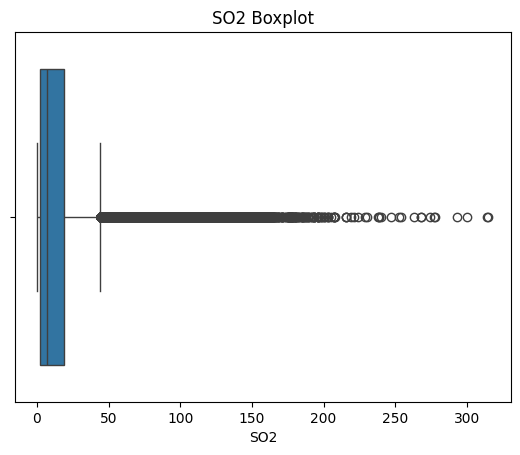

In [47]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['SO2'])
plt.title("SO2 Boxplot")
plt.show()

### NO2 Analysis:

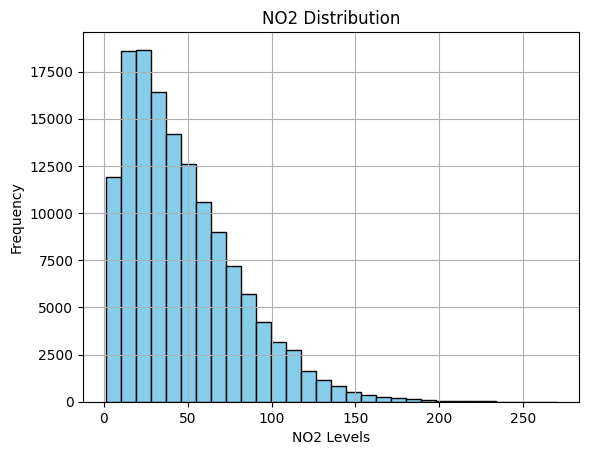

In [48]:
#Histogram shows the distribution of values.
merged_df['NO2'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("NO2 Distribution")
plt.xlabel("NO2 Levels")
plt.ylabel("Frequency")
plt.show()

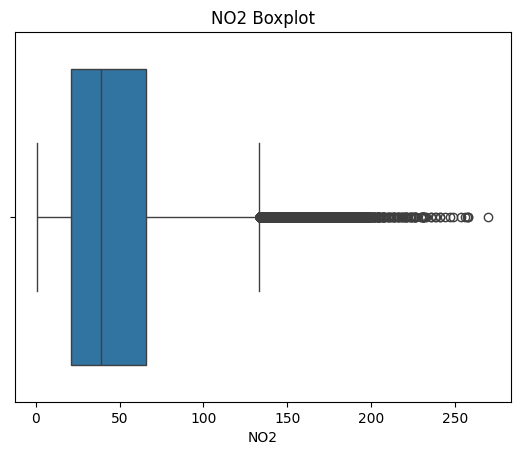

In [49]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['NO2'])
plt.title("NO2 Boxplot")
plt.show()

### CO Analysis:

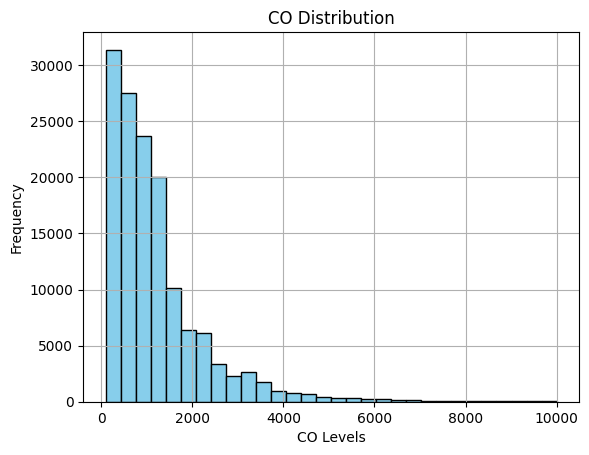

In [50]:
#Histogram shows the distribution of values.
merged_df['CO'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("CO Distribution")
plt.xlabel("CO Levels")
plt.ylabel("Frequency")
plt.show()

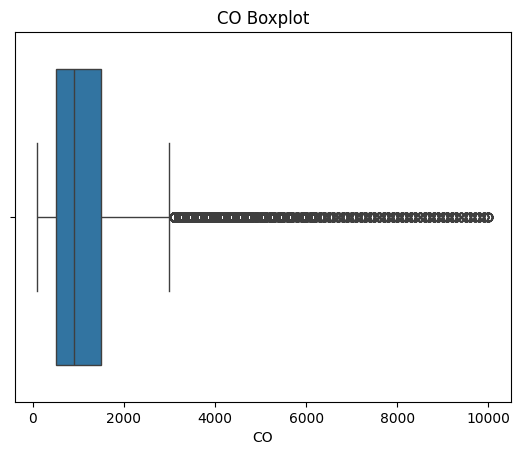

In [51]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['CO'])
plt.title("CO Boxplot")
plt.show()

### TEMP Analysis:

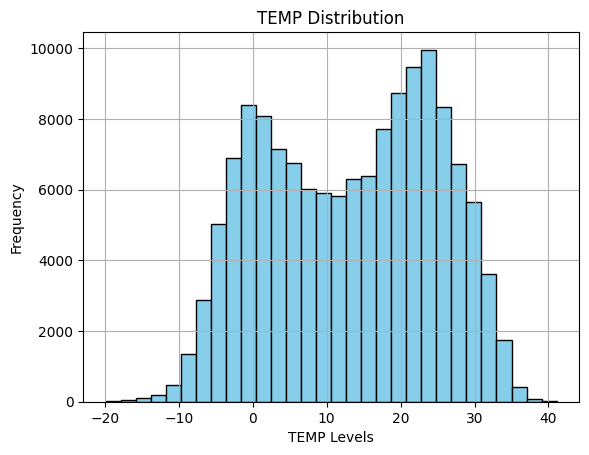

In [52]:
#Histogram shows the distribution of values.
merged_df['TEMP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("TEMP Distribution")
plt.xlabel("TEMP Levels")
plt.ylabel("Frequency")
plt.show()

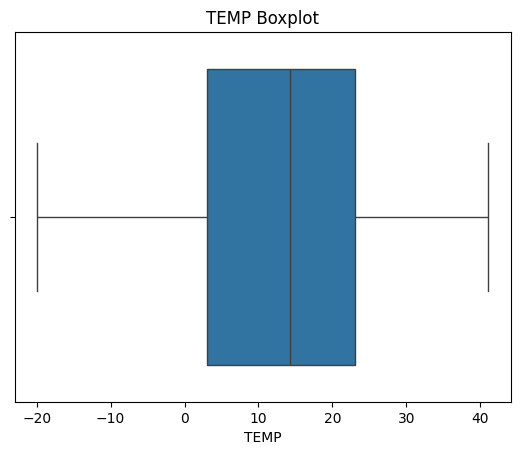

In [53]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['TEMP'])
plt.title("TEMP Boxplot")
plt.show()

### PRES Analysis:

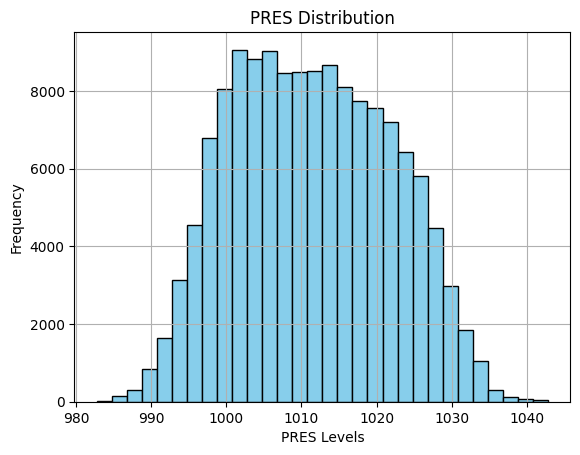

In [54]:
#Histogram shows the distribution of values.
merged_df['PRES'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("PRES Distribution")
plt.xlabel("PRES Levels")
plt.ylabel("Frequency")
plt.show()

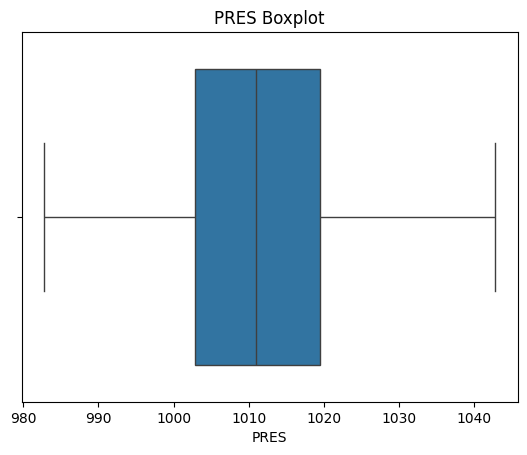

In [55]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['PRES'])
plt.title("PRES Boxplot")
plt.show()

### DEWP Analysis:

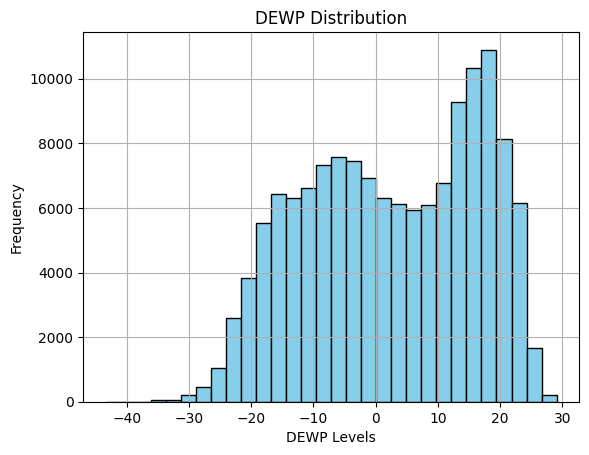

In [56]:
#Histogram shows the distribution of values.
merged_df['DEWP'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("DEWP Distribution")
plt.xlabel("DEWP Levels")
plt.ylabel("Frequency")
plt.show()

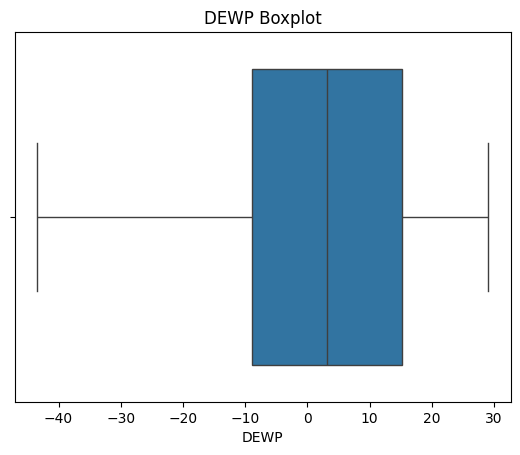

In [57]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['DEWP'])
plt.title("DEWP Boxplot")
plt.show()

### RAIN Analysis:

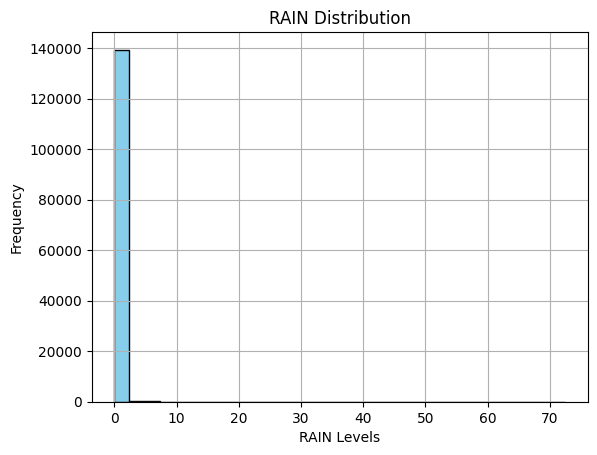

In [58]:
#Histogram shows the distribution of values.
merged_df['RAIN'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("RAIN Distribution")
plt.xlabel("RAIN Levels")
plt.ylabel("Frequency")
plt.show()

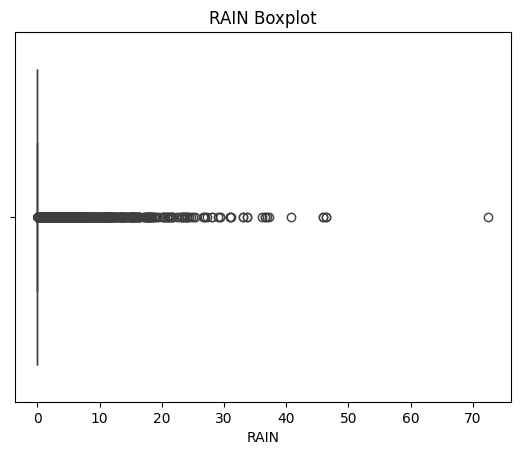

In [59]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['RAIN'])
plt.title("RAIN Boxplot")
plt.show()

### wd Analysis:

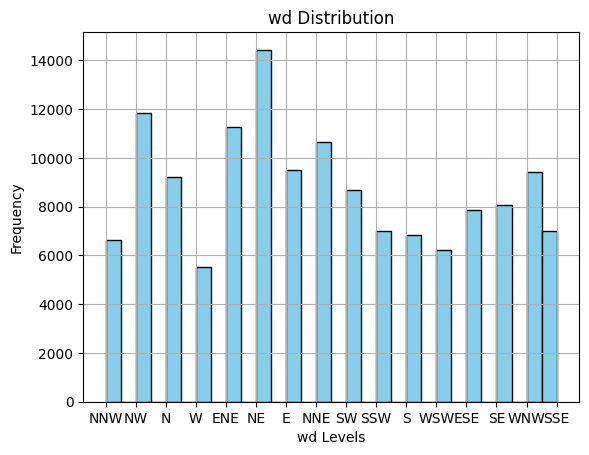

In [60]:
#Histogram shows the distribution of values.
merged_df['wd'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("wd Distribution")
plt.xlabel("wd Levels")
plt.ylabel("Frequency")
plt.show()

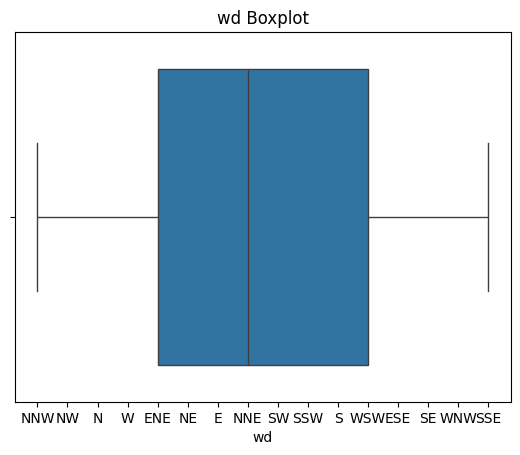

In [61]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['wd'])
plt.title("wd Boxplot")
plt.show()

### WSPM Analysis:

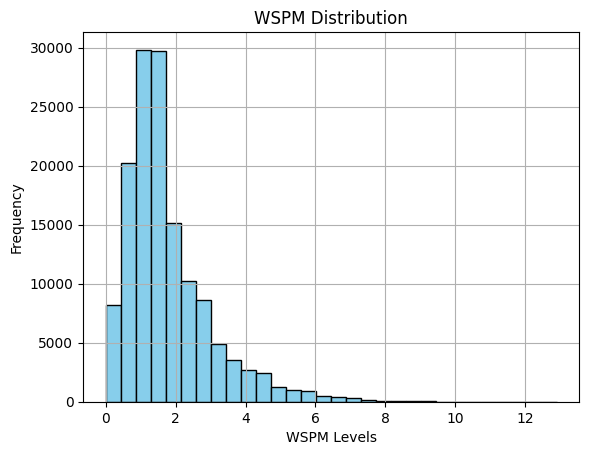

In [62]:
#Histogram shows the distribution of values.
merged_df['WSPM'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("WSPM Distribution")
plt.xlabel("WSPM Levels")
plt.ylabel("Frequency")
plt.show()

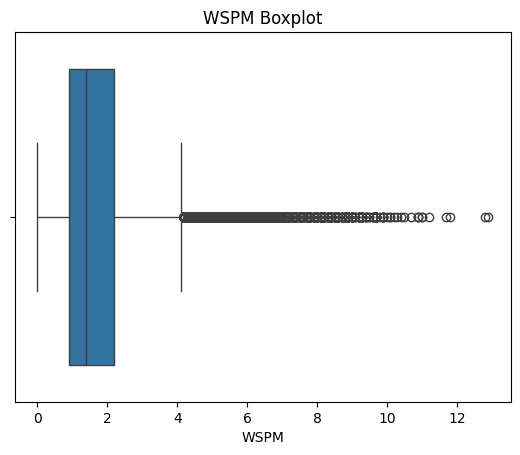

In [63]:
#Boxplot shows the outliers
sns.boxplot(x=merged_df['WSPM'])
plt.title("WSPM Boxplot")
plt.show()

### Distribution of Categorical Variables:

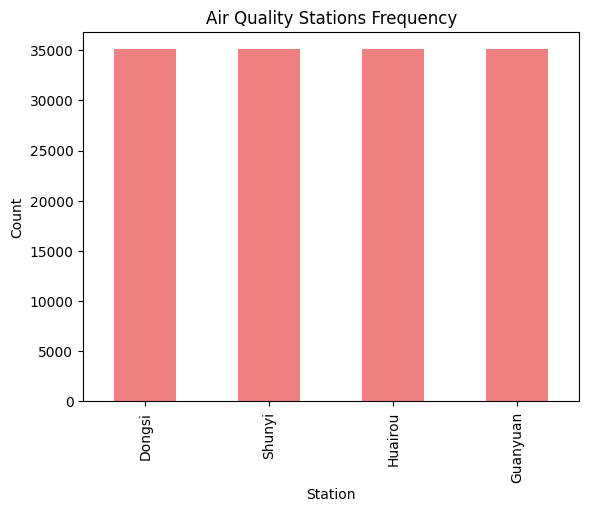

In [64]:
merged_df['station'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Air Quality Stations Frequency")
plt.xlabel("Station")
plt.ylabel("Count")
plt.show()

## Bivariate Analysis:

Bivariate Analysis analyzes the relationship between two variables.

### Pollutants vs Conditions:

Checking to see how pollutants react in various conditions.

 #### PM2.5 vs various conditions:

##### PM2.5 vs Temperature

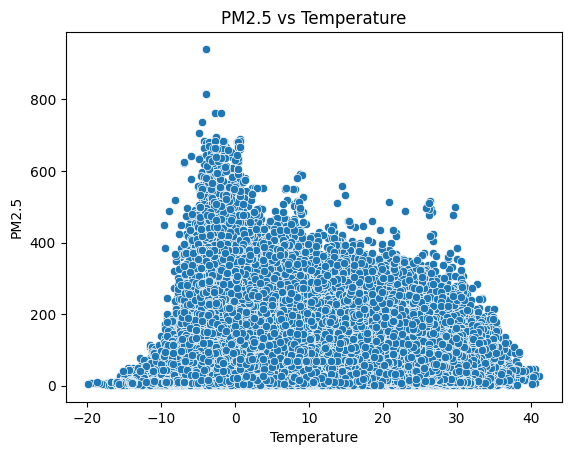

In [65]:
sns.scatterplot(x='TEMP', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Wind Speed:

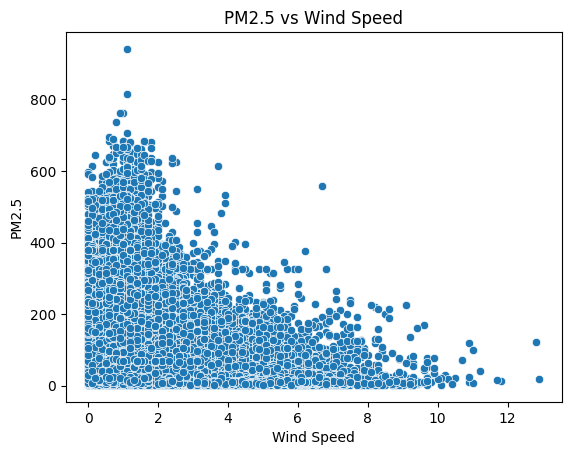

In [66]:
sns.scatterplot(x='WSPM', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Rainfall

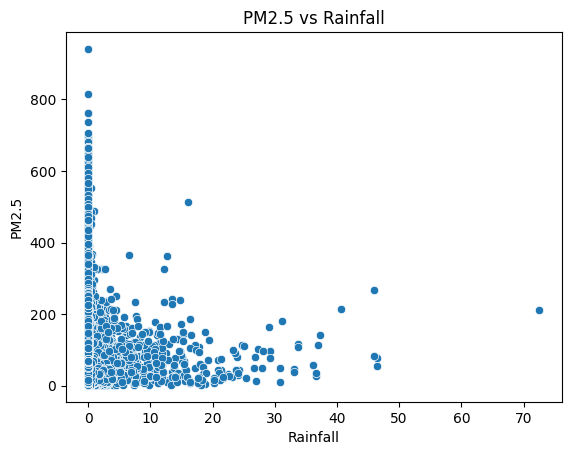

In [67]:
sns.scatterplot(x='RAIN', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("PM2.5")
plt.show()

##### PM2.5 vs Humidity/Dew Point

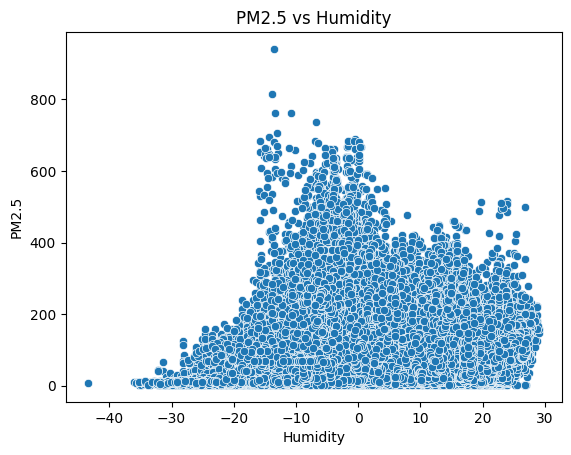

In [68]:
sns.scatterplot(x='DEWP', y='PM2.5', data=merged_df)
plt.title("PM2.5 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("PM2.5")
plt.show()

 #### PM10 vs various conditions:

##### PM10 vs Temperature

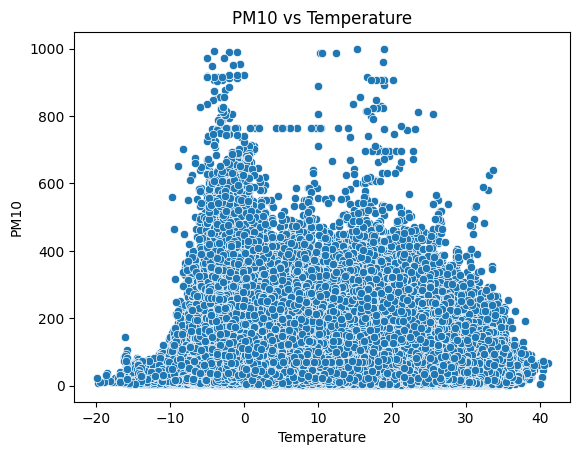

In [69]:
sns.scatterplot(x='TEMP', y='PM10', data=merged_df)
plt.title("PM10 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Wind Speed:

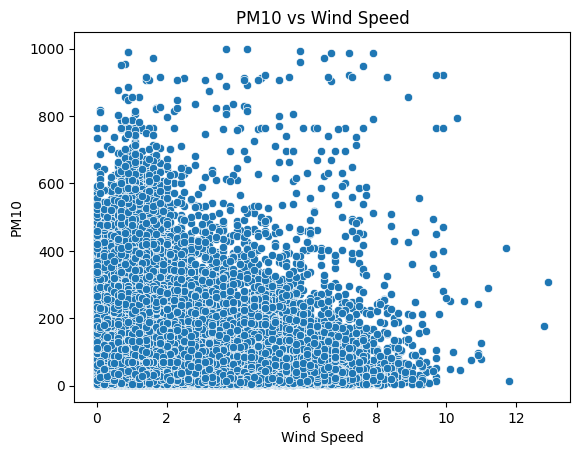

In [70]:
sns.scatterplot(x='WSPM', y='PM10', data=merged_df)
plt.title("PM10 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Rainfall

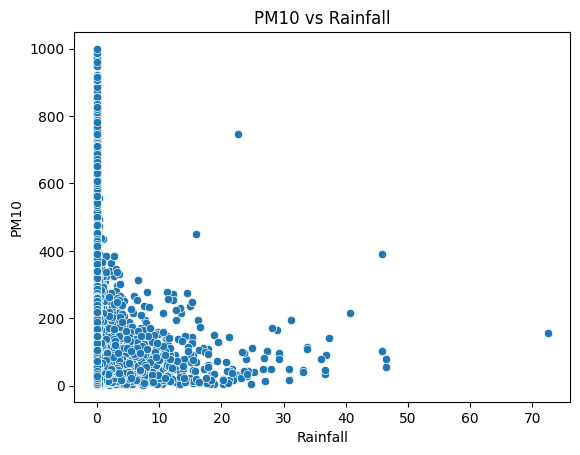

In [71]:
sns.scatterplot(x='RAIN', y='PM10', data=merged_df)
plt.title("PM10 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("PM10")
plt.show()

##### PM10 vs Humidity/Dew Point

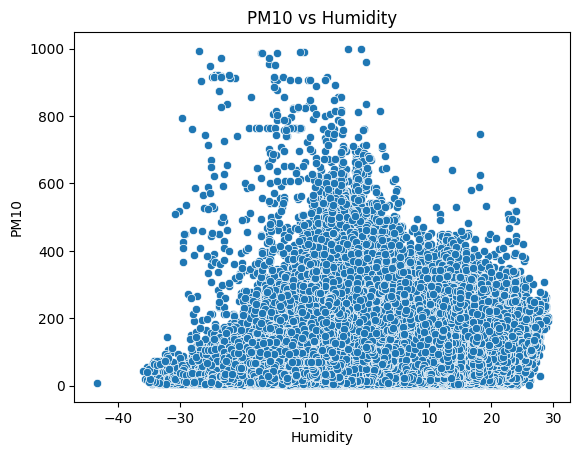

In [72]:
sns.scatterplot(x='DEWP', y='PM10', data=merged_df)
plt.title("PM10 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("PM10")
plt.show()

##### O3 vs Temperature

 #### SO2 vs various conditions:

##### SO2 vs Temperature

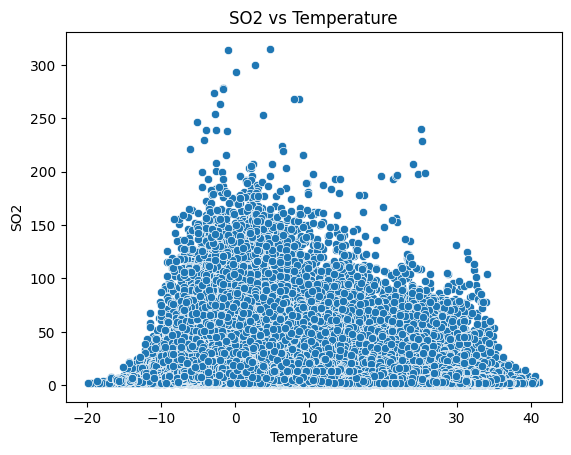

In [74]:
sns.scatterplot(x='TEMP', y='SO2', data=merged_df)
plt.title("SO2 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("SO2")
plt.show()

##### SO2 vs Wind Speed:

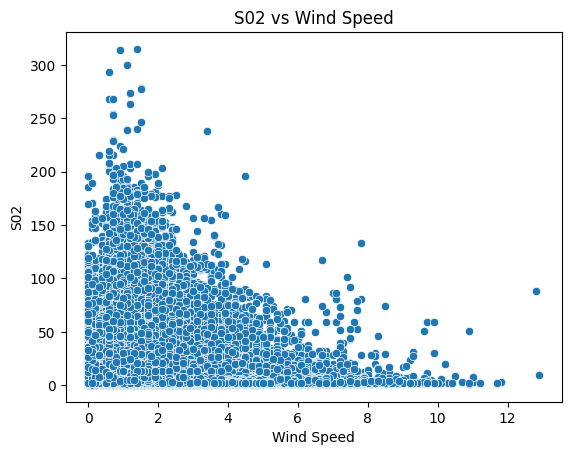

In [75]:
sns.scatterplot(x='WSPM', y='SO2', data=merged_df)
plt.title("S02 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("S02")
plt.show()

##### SO2 vs Rainfall

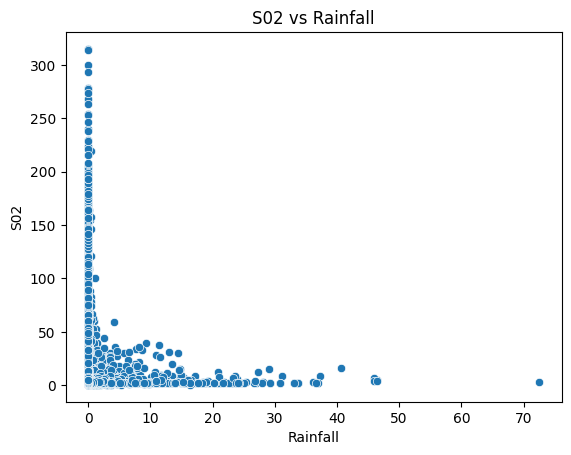

In [76]:
sns.scatterplot(x='RAIN', y='SO2', data=merged_df)
plt.title("S02 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("S02")
plt.show()

##### SO2 vs Humidity/Dew Point

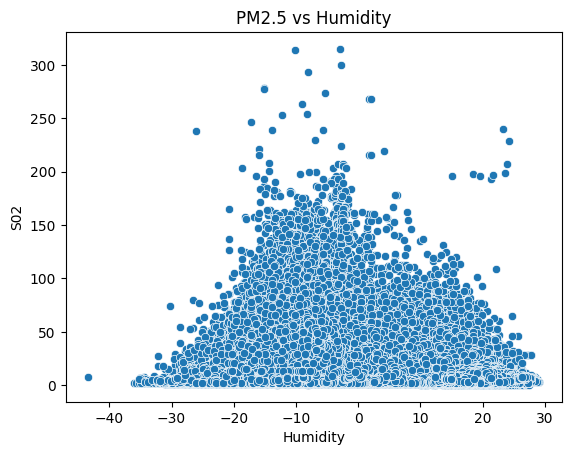

In [77]:
sns.scatterplot(x='DEWP', y='SO2', data=merged_df)
plt.title("PM2.5 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("S02")
plt.show()

 #### NO2 vs various conditions:

##### NO2 vs Temperature

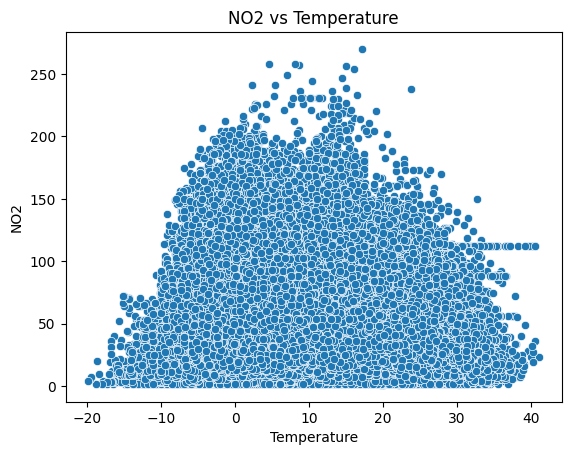

In [80]:
sns.scatterplot(x='TEMP', y='NO2', data=merged_df)
plt.title("NO2 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("NO2")
plt.show()

##### N02 vs Wind Speed:

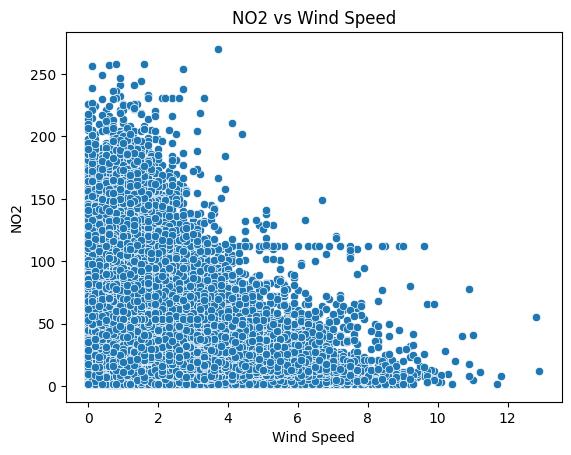

In [81]:
sns.scatterplot(x='WSPM', y='NO2', data=merged_df)
plt.title("NO2 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("NO2")
plt.show()

##### N02 vs Rainfall

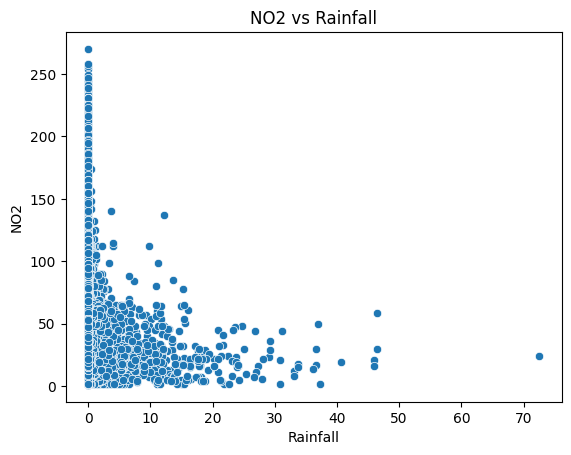

In [82]:
sns.scatterplot(x='RAIN', y='NO2', data=merged_df)
plt.title("NO2 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("NO2")
plt.show()

##### N02 vs Humidity/Dew Point

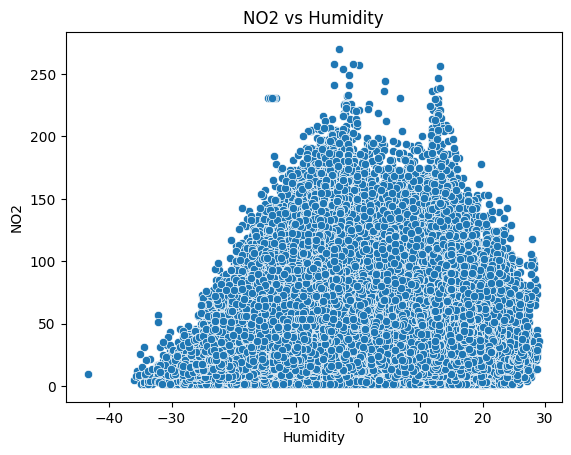

In [83]:
sns.scatterplot(x='DEWP', y='NO2', data=merged_df)
plt.title("NO2 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("NO2")
plt.show()

 #### CO vs various conditions:

##### CO vs Temperature

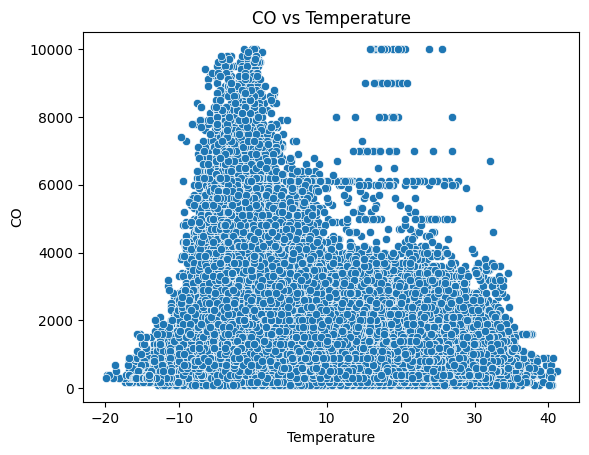

In [84]:
sns.scatterplot(x='TEMP', y='CO', data=merged_df)
plt.title("CO vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("CO")
plt.show()

##### CO vs Wind Speed:

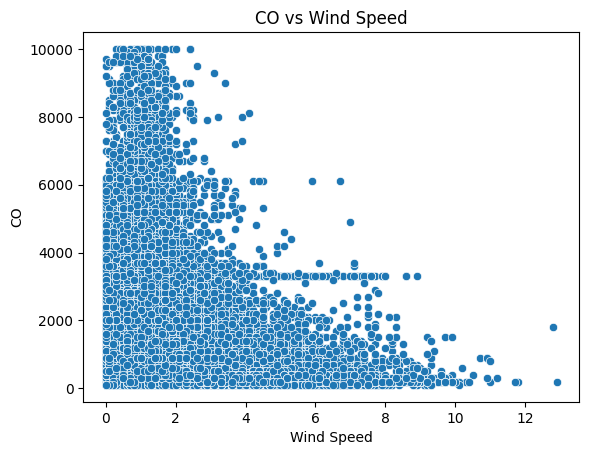

In [85]:
sns.scatterplot(x='WSPM', y='CO', data=merged_df)
plt.title("CO vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("CO")
plt.show()

##### CO vs Rainfall

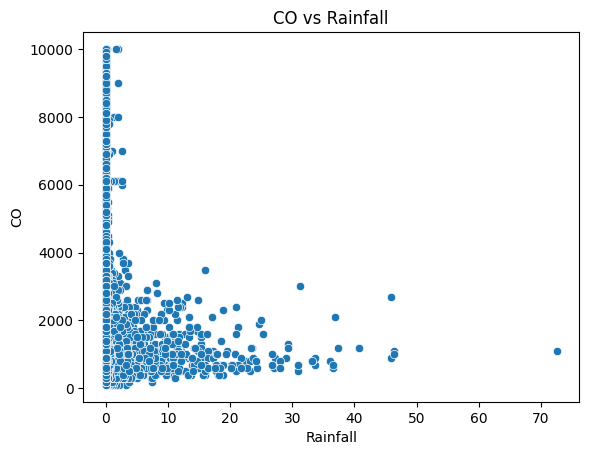

In [86]:
sns.scatterplot(x='RAIN', y='CO', data=merged_df)
plt.title("CO vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("CO")
plt.show()

##### CO vs Humidity/Dew Point

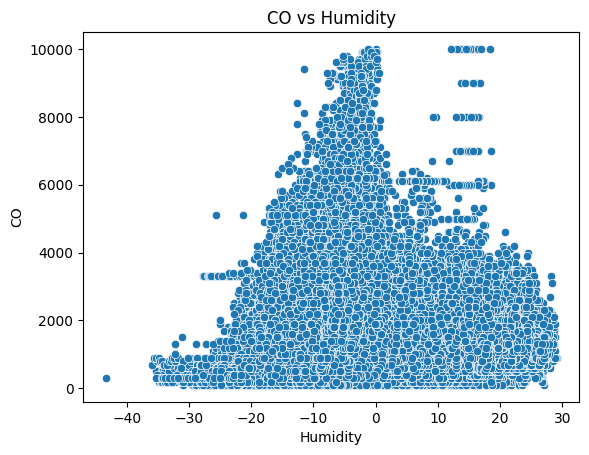

In [87]:
sns.scatterplot(x='DEWP', y='CO', data=merged_df)
plt.title("CO vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("CO")
plt.show()

 #### O3 vs various conditions:

##### O3 vs Temperature

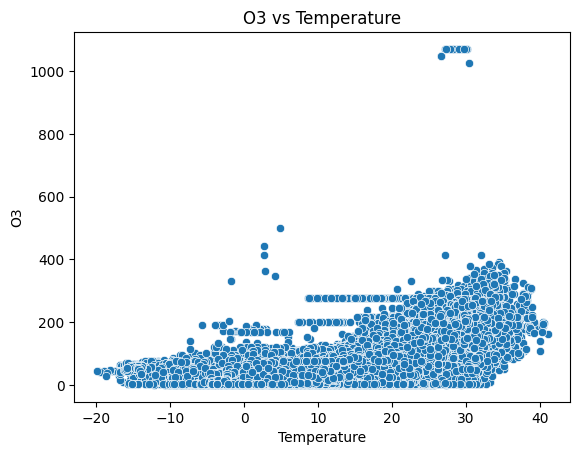

In [88]:
sns.scatterplot(x='TEMP', y='O3', data=merged_df)
plt.title("O3 vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("O3")
plt.show()

##### O3 vs Wind Speed:

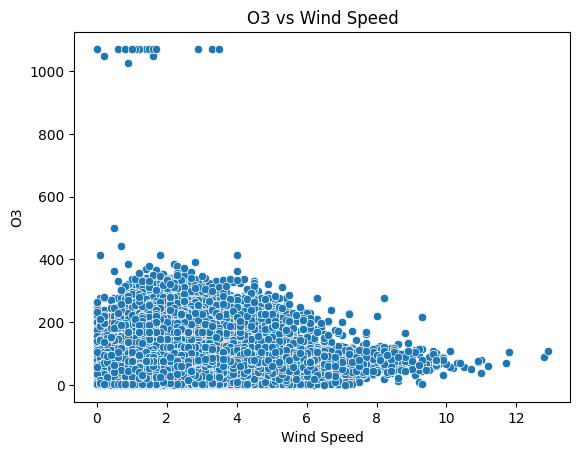

In [89]:
sns.scatterplot(x='WSPM', y='O3', data=merged_df)
plt.title("O3 vs Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("O3")
plt.show()

##### O3 vs Rainfall

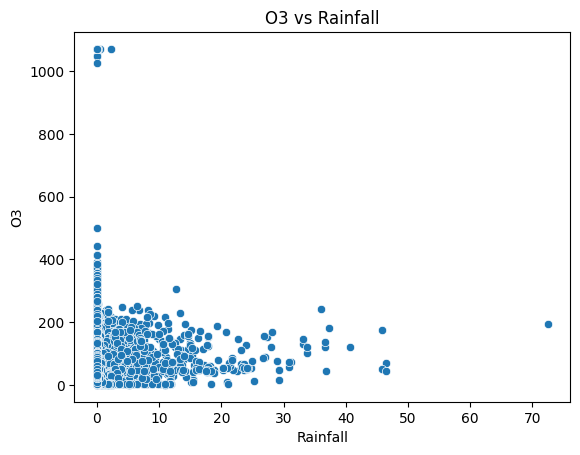

In [90]:
sns.scatterplot(x='RAIN', y='O3', data=merged_df)
plt.title("O3 vs Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("O3")
plt.show()

##### O3 vs Humidity/Dew Point

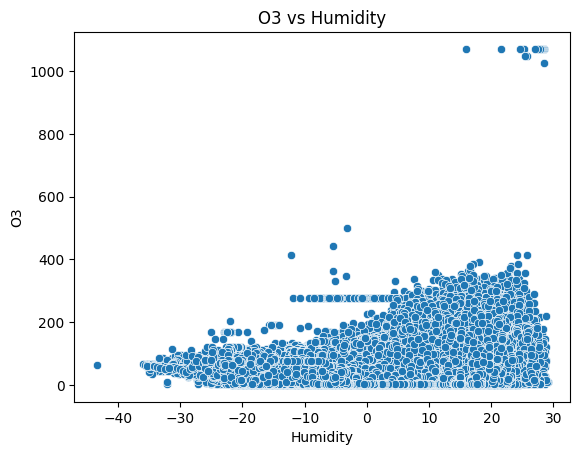

In [91]:
sns.scatterplot(x='DEWP', y='O3', data=merged_df)
plt.title("O3 vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("O3")
plt.show()

## Multivariable Analysis:

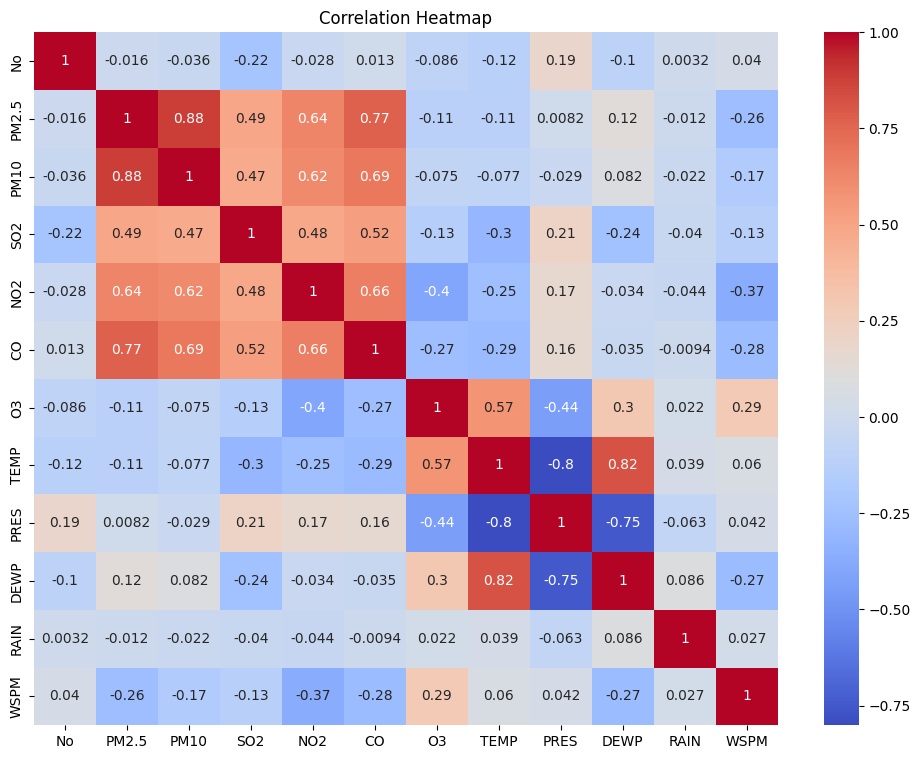

In [104]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Time series Analysis:

###PM2.5 Over the years:

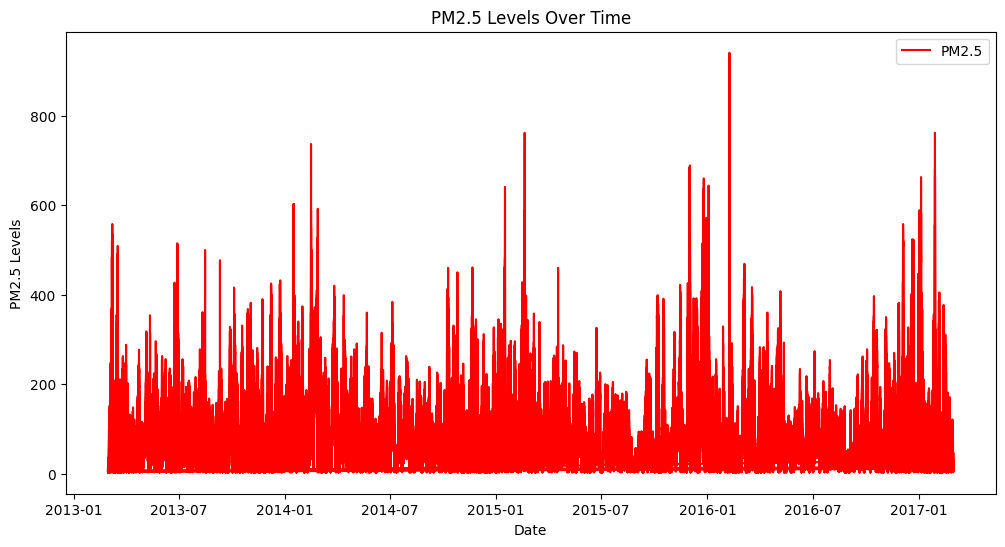

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM2.5'], label='PM2.5', color='red')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 Levels Over Time')
plt.legend()
plt.show()

###PM10 Over the years:

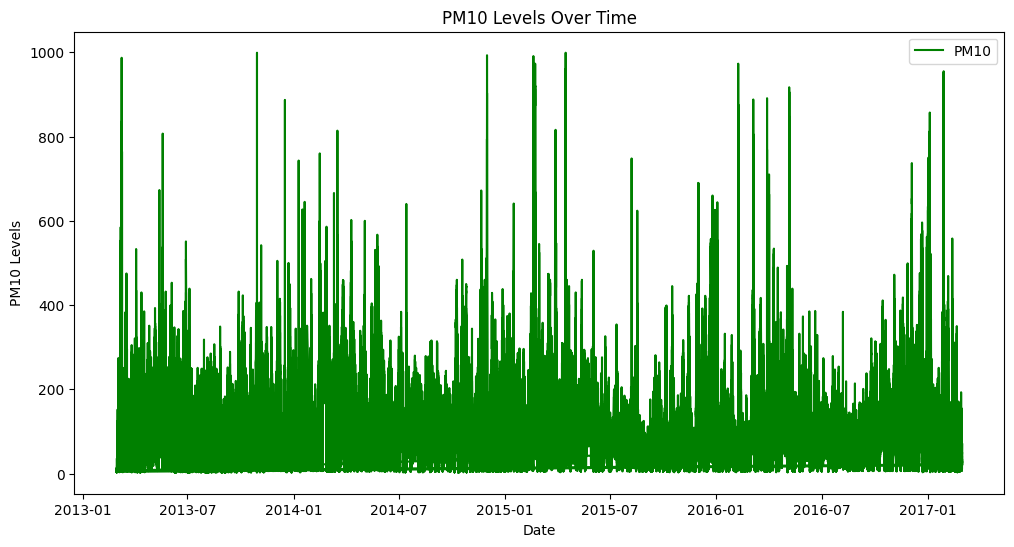

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM10'], label='PM10', color='green')
plt.xlabel('Date')
plt.ylabel('PM10 Levels')
plt.title('PM10 Levels Over Time')
plt.legend()
plt.show()

###SO2 Over the years:

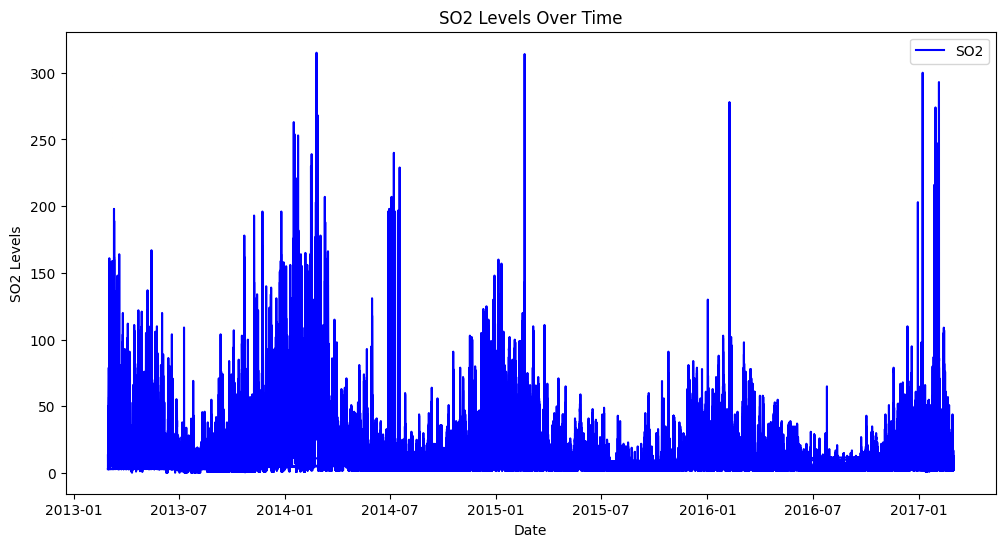

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO2'], label='SO2', color='blue')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.title('SO2 Levels Over Time')
plt.legend()
plt.show()

###SO2 Over the years:

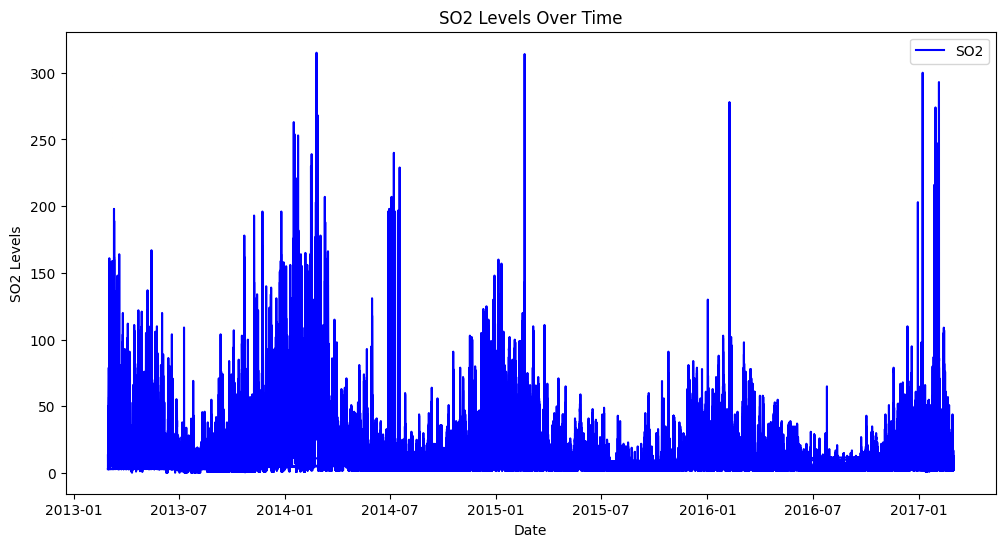

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO2'], label='SO2', color='blue')
plt.xlabel('Date')
plt.ylabel('SO2 Levels')
plt.title('SO2 Levels Over Time')
plt.legend()
plt.show()

###NO2 Over the years:

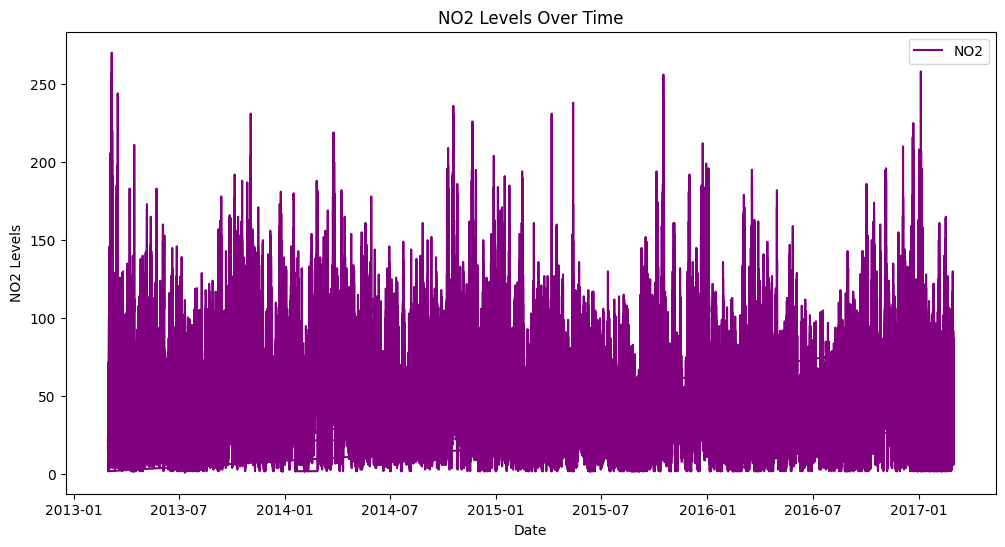

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['NO2'], label='NO2', color='purple')
plt.xlabel('Date')
plt.ylabel('NO2 Levels')
plt.title('NO2 Levels Over Time')
plt.legend()
plt.show()

###CO Over the years:

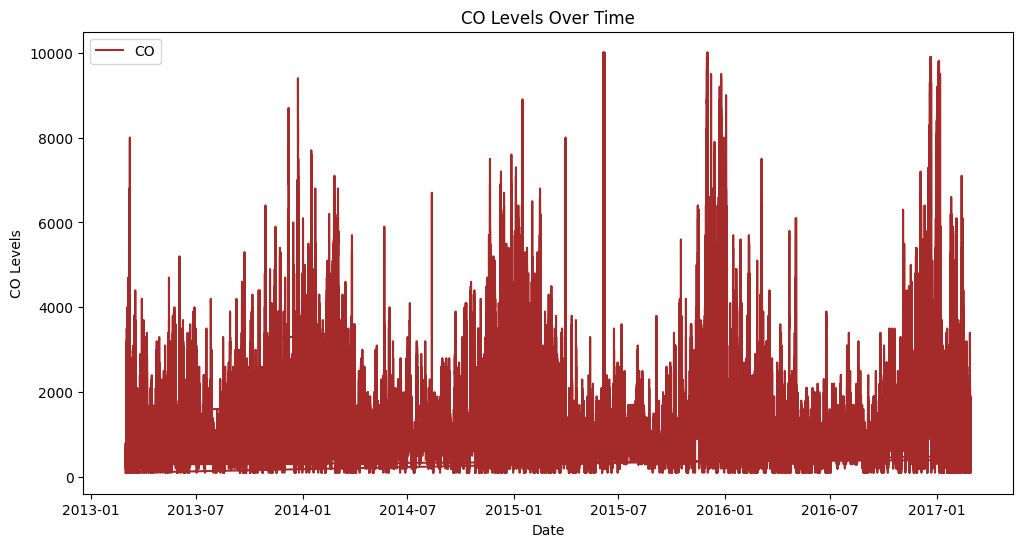

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['CO'], label='CO', color='brown')
plt.xlabel('Date')
plt.ylabel('CO Levels')
plt.title('CO Levels Over Time')
plt.legend()
plt.show()

###O3 Over the years:

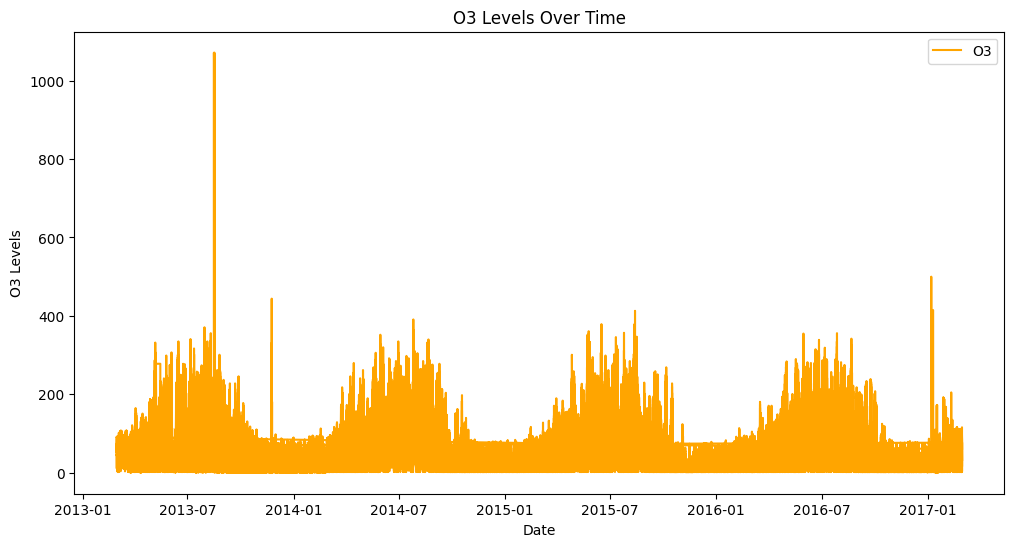

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['O3'], label='O3', color='orange')
plt.xlabel('Date')
plt.ylabel('O3 Levels')
plt.title('O3 Levels Over Time')
plt.legend()
plt.show()

## Feature Engineering:

### Polution Ratio:

These ratios help you understand the composition of the pollution.

#### PM Ratio:

A high PM2.5/PM10 ratio = finer particles dominate, which are more harmful.

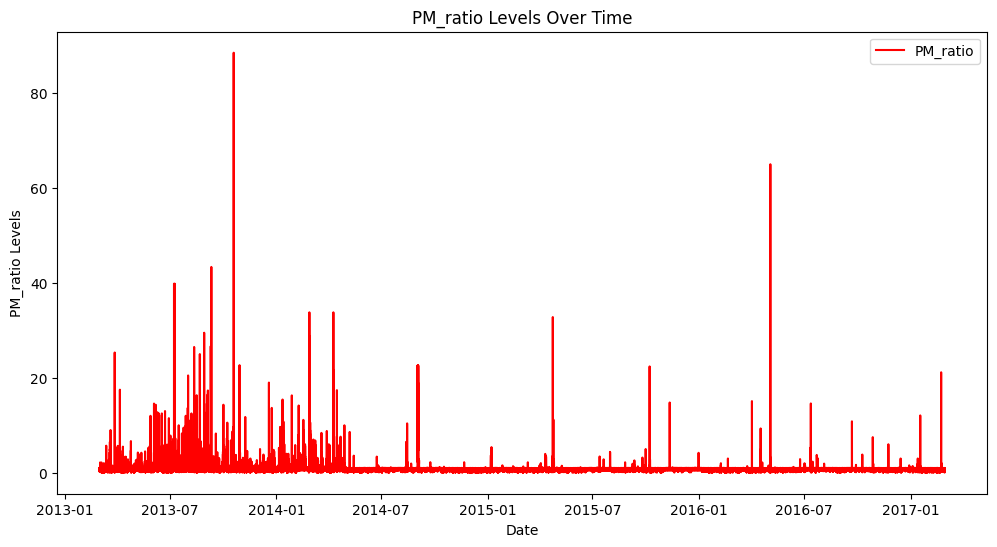

In [127]:
merged_df['PM_ratio'] = merged_df['PM2.5'] / merged_df['PM10']

plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['PM_ratio'], label='PM_ratio', color='red')
plt.xlabel('Date')
plt.ylabel('PM_ratio Levels')
plt.title('PM ratio Levels Over Time')
plt.legend()
plt.show()

#### SO Ratio:

NO2/SO2 might indicate vehicle vs industry pollution sources.

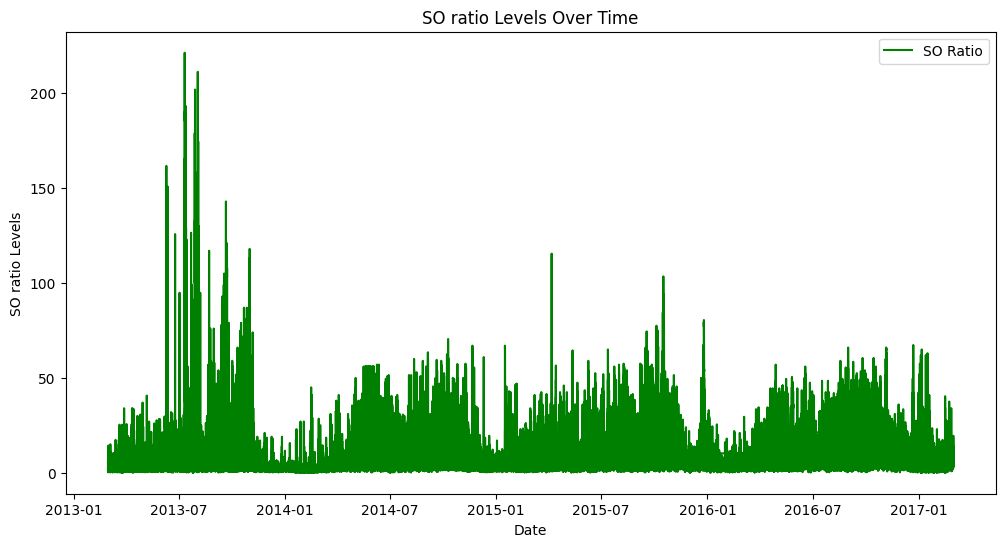

In [132]:
merged_df['SO_ratio'] = merged_df['NO2'] / merged_df['SO2']


plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'], merged_df['SO_ratio'], label='SO Ratio', color='green')
plt.xlabel('Date')
plt.ylabel('SO ratio Levels')
plt.title('SO ratio Levels Over Time')
plt.legend()
plt.show()

### Rolling Averages:

It highlights the underlying trends and helps for forecasting models.

In [131]:
merged_df['pm25_3hr_avg'] = merged_df['PM2.5'].rolling(window=3).mean()

### Categories for Air Quality Index(AQI)

#### PM2.5 AQI

In [156]:
merged_df['PM25_AQI_level'] = pd.cut(merged_df['PM2.5'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['PM25_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
140251    Good
140252    Good
140253    Good
140254    Good
140255    Good
Name: PM25_AQI_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### PM10 AQI

In [157]:
merged_df['PM10_AQI_level'] = pd.cut(merged_df['PM10'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['PM10_AQI_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
140251    Good
140252    Good
140253    Good
140254    Good
140255    Good
Name: PM10_AQI_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### SO2 AQI

In [158]:
merged_df['SO2_level'] = pd.cut(merged_df['SO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['SO2_level']

0         Good
1         Good
2         Good
3         Good
4         Good
          ... 
140251    Good
140252    Good
140253    Good
140254    Good
140255    Good
Name: SO2_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### NO2 AQI

In [159]:
merged_df['NO2_AQI_level'] = pd.cut(merged_df['NO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['NO2_AQI_level']

0             Good
1             Good
2             Good
3             Good
4             Good
            ...   
140251        Good
140252        Good
140253        Good
140254        Good
140255    Moderate
Name: NO2_AQI_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### CO AQI

In [161]:
# Example: Simplified
merged_df['CO_AQI_level'] = pd.cut(merged_df['CO'], bins=[0, 50, 100, 150, 200, 300, 600], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['CO_AQI_level']

0         Very Unhealthy
1         Very Unhealthy
2         Very Unhealthy
3         Very Unhealthy
4                    Bad
               ...      
140251        Hazardious
140252        Hazardious
140253        Hazardious
140254        Hazardious
140255        Hazardious
Name: CO_AQI_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

#### O3 AQI

In [162]:
merged_df['O3_AQI_level'] = pd.cut(merged_df['NO2'], bins=[0, 50, 100, 150, 200, 300, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Bad', 'Very Unhealthy', 'Hazardious'])
merged_df['O3_AQI_level']

0             Good
1             Good
2             Good
3             Good
4             Good
            ...   
140251        Good
140252        Good
140253        Good
140254        Good
140255    Moderate
Name: O3_AQI_level, Length: 140256, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy' < 'Bad' < 'Very Unhealthy' <
                         'Hazardious']

### Turning string into numerical data:

Only numerical data can be used to train ML models.

In [170]:
merged_df = pd.get_dummies(merged_df, columns=['wd'])
merged_df

datetime     No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013-03-01 00:00:00      1    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1      2013-03-01 01:00:00      2    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2      2013-03-01 02:00:00      3    7.0   7.0  3.0  17.0  300.0  60.0  -1.2   
3      2013-03-01 03:00:00      4    3.0   3.0  5.0  18.0  300.0  60.0  -1.4   
4      2013-03-01 04:00:00      5    3.0   3.0  7.0  18.0  200.0  84.0  -1.9   
...                    ...    ...    ...   ...  ...   ...    ...   ...   ...   
140251 2017-02-28 19:00:00  35060   13.0  37.0  3.0  36.0  400.0  60.0  12.5   
140252 2017-02-28 20:00:00  35061   20.0  43.0  4.0  48.0  500.0  43.0  11.6   
140253 2017-02-28 21:00:00  35062   16.0  33.0  5.0  39.0  500.0  50.0  10.8   
140254 2017-02-28 22:00:00  35063   11.0  24.0  5.0  47.0  500.0  41.0  10.5   
140255 2017-02-28 23:00:00  35064   15.0  27.0  5.0  53.0  600.0  33.0   8.6   

          PRES  ...  wd_NNW  wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  wd_SW  \
0       1024.5  ...    True  False  False  False   False   False  False   
1       1025.1  ...   False   True  False  False   False   False  False   
2       1025.3  ...    True  False  False  False   False   False  False   
3       1026.2  ...   False  False  False  False   False   False  False   
4       1027.1  ...    True  False  False  False   False   False  False   
...        ...  ...     ...    ...    ...    ...     ...     ...    ...   
140251  1013.5  ...   False   True  False  False   False   False  False   
140252  1013.6  ...   False  False  False  False   False   False  False   
140253  1014.2  ...   False   True  False  False   False   False  False   
140254  1014.4  ...    True  False  False  False   False   False  False   
140255  1014.1  ...   False  False  False  False   False   False  False   

         wd_W wd_WNW wd_WSW  
0       False  False  False  
1       False  False  False  
2       False  False  False  
3       False  False  False  
4       False  False  False  
...       ...    ...    ...  
140251  False  False  False  
140252  False   True  False  
140253  False  False  False  
140254  False  False  False  
140255  False  False  False  

[140256 rows x 42 columns]

### Station Data:

Pollution varies by location type, so it is important to add meta data.

In [175]:
merged_df['station_type'] = merged_df['station'].map({
    'Dongsi': 'Urban',
    'Shunyi': 'Suburban',
    'Huairou': 'Rural',
    'Guanyuan': 'Industrial',
})
merged_df


datetime     No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013-03-01 00:00:00      1    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1      2013-03-01 01:00:00      2    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2      2013-03-01 02:00:00      3    7.0   7.0  3.0  17.0  300.0  60.0  -1.2   
3      2013-03-01 03:00:00      4    3.0   3.0  5.0  18.0  300.0  60.0  -1.4   
4      2013-03-01 04:00:00      5    3.0   3.0  7.0  18.0  200.0  84.0  -1.9   
...                    ...    ...    ...   ...  ...   ...    ...   ...   ...   
140251 2017-02-28 19:00:00  35060   13.0  37.0  3.0  36.0  400.0  60.0  12.5   
140252 2017-02-28 20:00:00  35061   20.0  43.0  4.0  48.0  500.0  43.0  11.6   
140253 2017-02-28 21:00:00  35062   16.0  33.0  5.0  39.0  500.0  50.0  10.8   
140254 2017-02-28 22:00:00  35063   11.0  24.0  5.0  47.0  500.0  41.0  10.5   
140255 2017-02-28 23:00:00  35064   15.0  27.0  5.0  53.0  600.0  33.0   8.6   

          PRES  ...  wd_NW   wd_S  wd_SE wd_SSE  wd_SSW  wd_SW   wd_W  wd_WNW  \
0       1024.5  ...  False  False  False  False   False  False  False   False   
1       1025.1  ...   True  False  False  False   False  False  False   False   
2       1025.3  ...  False  False  False  False   False  False  False   False   
3       1026.2  ...  False  False  False  False   False  False  False   False   
4       1027.1  ...  False  False  False  False   False  False  False   False   
...        ...  ...    ...    ...    ...    ...     ...    ...    ...     ...   
140251  1013.5  ...   True  False  False  False   False  False  False   False   
140252  1013.6  ...  False  False  False  False   False  False  False    True   
140253  1014.2  ...   True  False  False  False   False  False  False   False   
140254  1014.4  ...  False  False  False  False   False  False  False   False   
140255  1014.1  ...  False  False  False  False   False  False  False   False   

       wd_WSW station_type  
0       False        Urban  
1       False        Urban  
2       False        Urban  
3       False        Urban  
4       False        Urban  
...       ...          ...  
140251  False   Industrial  
140252  False   Industrial  
140253  False   Industrial  
140254  False   Industrial  
140255  False   Industrial  

[140256 rows x 43 columns]